In [26]:
#from testing file
import csv
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from pylab import *
Multimeas = pd.read_csv("C:/Users/chris/Desktop/projects/optometry/jupyter/opt.csv")
roi_df = Multimeas
def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

def gaussGraph(col, table, expected=None):
    nparr = np.asarray(table[col].tolist())
    y,x,_=hist(nparr,100,alpha=.3,label='data')
    x=(x[1:]+x[:-1])/2
    if expected is None:
        expected = getGaussExpected(nparr, x, y)
    print(expected)
    params,cov=curve_fit(gauss,x,y,expected)
    sigma=sqrt(diag(cov))
    print("Least Squares Sum:", least_squares(params, x, y))
    plot(x,gauss(x,*params),color='red',lw=3,label='model')
    legend()
    return pd.DataFrame(data={'params':params,'sigma':sigma},index=gauss.__code__.co_varnames[1:])
    
    
def bimodalGraph(col, table, expected=None): #change bins?
    '''Bimodal Graph for histogram of col from table with 100 bins.
    Based upon: https://stackoverflow.com/questions/35990467/fit-two-gaussians-to-a-histogram-from-one-set-of-data-python
    '''
    nparr = np.asarray(table[col].tolist())
    y,x,_=hist(nparr,100,alpha=.3,label='data')
    x=(x[1:]+x[:-1])/2
    if expected is None:
        print("getBimodalExpected was called.")
        expected = getBimodalExpected(nparr, x, y)
    print("Expected values: ")
    print(expected)
    params,cov=curve_fit(bimodal,x,y,expected)
    sigma=sqrt(diag(cov))
    print("Least Squares Sum:", least_squares(params, x, y))
    plot(x,bimodal(x,*params),color='red',lw=3,label='model')
    legend()
    return pd.DataFrame(data={'params':params,'sigma':sigma},index=bimodal.__code__.co_varnames[1:])

def getGaussExpected(nparr, x, y):
    maxloc = np.argmax(y)
    maxlocx = x[maxloc]
    ymax = np.max(y)
    return [maxlocx,20,ymax]

def getBimodalExpected(nparr, x, y):
    '''Get's an exected bimodal tuple from the data to be passed into scipy's curve fit fn.
    Procedure: 
        1. Find the peak of zeros (largest peak within the first half of data)
        2. Find the min in the first half (end of first normal, start of second)
        3. Find location matching min in second half (end of second normal)
        4. Find max past 4 times the location of peak of zeros (peak of second normal)
        5. Manipulate and return.
        '''
    #find where max occurs in the first half (0 - 100) (zero's peak, middle of first)
    maxloc = np.argmax(y[0:50])
    maxlocx = x[maxloc]
    ymax = np.max(y[0:50])
    
    #find min in the first half (end of first normal, start of second)
    miny = np.argmin(y[0:50])
    minx = x[miny]
    
    #find matching end location in the second half (end of second)
    endminx = x[50 + find_nearest(nparr[50:100], miny)]
    
    #find max after zero's peak times 4 (middle of second)
    maxlocsecond = maxloc * 4 + np.argmax(y[maxloc * 4 :100])
    ymaxsecond = np.max(y[maxloc * 4:100])
    maxlocsecondx = x[maxlocsecond]
    
    return (maxlocx,20,ymax,maxlocsecondx,30,ymaxsecond)

def find_nearest(array, value):
    '''This function finds the location of the nearest values.'''
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [3]:
#roi_df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002321C6F3860>]],
      dtype=object)

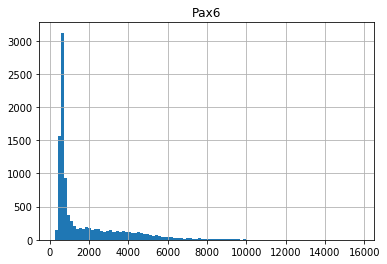

In [4]:
roi_df.hist(column="Pax6", bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023219ABADD8>]],
      dtype=object)

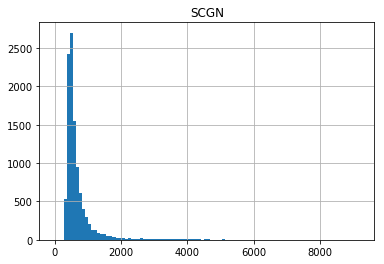

In [5]:
roi_df.hist(column="SCGN", bins=100)

Expected values: 
(638.766225, 40, 3123.0, 1876.9941450000001, 24, 189.0)


,params,sigma
mu1,616.825001,1.169997
sigma1,104.801726,1.110690
A1,2987.991655,27.347335
mu2,225.034040,737.923782
sigma2,-3338.329033,404.445271
A2,207.225039,17.897252


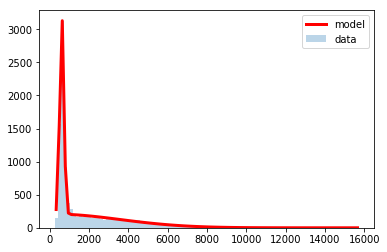

In [11]:
bimodalGraph("Pax6", roi_df, (638.766225, 40, 3123.0, 1876.9941450000001, 24, 189.0))

getBimodalExpected was called.
Expected values: 
(504.3545650000001, 20, 2698.0, 1879.8670150000003, 30, 28.0)


,params,sigma
mu1,465.627470,1.707232
sigma1,81.128140,3.513121
A1,2485.066739,134.159866
mu2,668.641659,27.718638
sigma2,182.769247,14.676873
A2,847.011129,58.618608


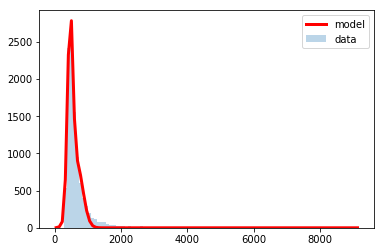

In [19]:
bimodalGraph("SCGN", roi_df)

[504.3545650000001, 20, 2698.0]


,params,sigma
mu,495.820103,4.047620
sigma,115.627562,4.047382
A,2713.591902,82.264760


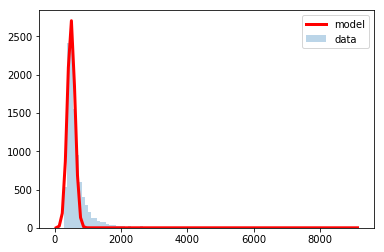

In [26]:
gaussGraph("SCGN", roi_df)

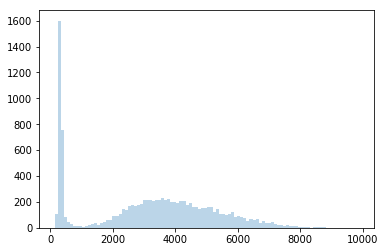

In [7]:
    nparr = np.asarray(roi_df['DAPI'].tolist())
    y,x,_=hist(nparr,100,alpha=.3,label='data')
    x=(x[1:]+x[:-1])/2

In [8]:
x, y

(array([ 190.630955,  287.982865,  385.334775,  482.686685,  580.038595,
         677.390505,  774.742415,  872.094325,  969.446235, 1066.798145,
        1164.150055, 1261.501965, 1358.853875, 1456.205785, 1553.557695,
        1650.909605, 1748.261515, 1845.613425, 1942.965335, 2040.317245,
        2137.669155, 2235.021065, 2332.372975, 2429.724885, 2527.076795,
        2624.428705, 2721.780615, 2819.132525, 2916.484435, 3013.836345,
        3111.188255, 3208.540165, 3305.892075, 3403.243985, 3500.595895,
        3597.947805, 3695.299715, 3792.651625, 3890.003535, 3987.355445,
        4084.707355, 4182.059265, 4279.411175, 4376.763085, 4474.114995,
        4571.466905, 4668.818815, 4766.170725, 4863.522635, 4960.874545,
        5058.226455, 5155.578365, 5252.930275, 5350.282185, 5447.634095,
        5544.986005, 5642.337915, 5739.689825, 5837.041735, 5934.393645,
        6031.745555, 6129.097465, 6226.449375, 6323.801285, 6421.153195,
        6518.505105, 6615.857015, 6713.208925, 6810

In [37]:
    miny = np.argmin(y[0:50])
    minx = x[miny]

In [41]:
miny

9

In [58]:
miny = np.argmin(y[0:50])
sum = 0
for i in range(miny):
    sum += i * y[i]
avg = sum / miny
avg

446.0

In [59]:
var = 0
for i in range(miny):
    var += y[i] * (i - avg) ** 2
var *= (1 / miny)
stddev = var ** (1 / 2)
stddev

7653.151391565583

getBimodalExpected was called.
Expected values: 
(287.982865, 20, 1600.0, 3597.947805, 30, 227.0)


,params,sigma
mu1,315.492983,1.172215
sigma1,52.202482,1.298449
A1,1823.897681,37.350458
mu2,3893.828414,33.890067
sigma2,1489.606011,34.422399
A2,212.877325,4.198295


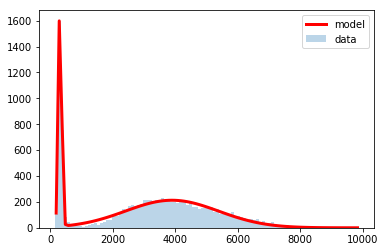

In [9]:
bimodalGraph("DAPI", roi_df)

Expected values: 
(287.982865, 7653, 1600.0, 3597.947805, 30, 227.0)


,params,sigma
mu1,315.492989,1.172212
sigma1,52.202472,1.298445
A1,1823.897703,37.350129
mu2,3893.834293,33.890974
sigma2,1489.612042,34.423397
A2,212.876896,4.198242


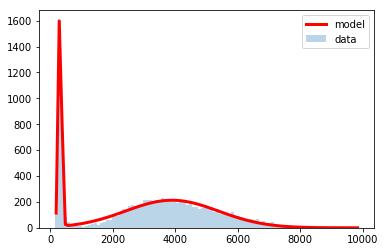

In [66]:
bimodalGraph("DAPI", roi_df, (287.982865, 7653, 1600.0, 3597.947805, 30, 227.0))

getBimodalExpected was called.
Expected values: 
(287.982865, 20, 1600.0, 3597.947805, 30, 227.0)
Least Squares Sum: 29688.228209034045


,params,sigma
mu1,315.492983,1.172215
sigma1,52.202482,1.298449
A1,1823.897681,37.350458
mu2,3893.828414,33.890067
sigma2,1489.606011,34.422399
A2,212.877325,4.198295


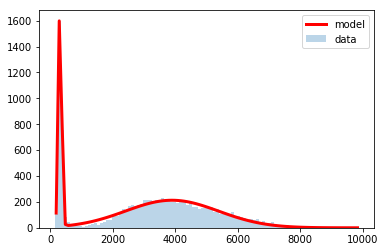

In [27]:
bimodalGraph("DAPI", roi_df)

[287.982865, 20, 1600.0]
Least Squares Sum: 1258039.4470185917


,params,sigma
mu,315.160073,7.202780
sigma,53.040291,7.859203
A,1822.510080,221.032122


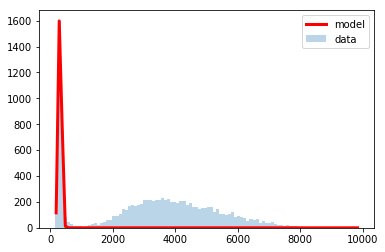

In [28]:
gaussGraph("DAPI", roi_df)

In [11]:
gauss(300, 315.160073, 53.040291, 1822.510080)

1749.5658242040558

In [23]:
def least_squares(params, x, y):
    l = 0
    for xcord, ycord in zip(x, y):
        if (len(params) == 3):
            l += (gauss(xcord, params[0], params[1], params[2]) - ycord) ** 2
        else:
            l += (bimodal(xcord, params[0], params[1], params[2], params[3], params[4], params[5]) - ycord) ** 2
    return l

1598.305475980078